<a href="https://colab.research.google.com/github/Laura77-code/introToAI/blob/main/%5BAI2025_Assignment%5D_CIFAR10_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR10 Classification

## Import Packages

In [1]:
import sys
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

### Data Preparation
Use CIFAR10 handwriting dataset

In [2]:
cifar10 = tf.keras.datasets.cifar10

Prepare data for training

In [3]:
# train / test split
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# minmax normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Data Augmentation

In [4]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.1),
    ],
    name="data_augmentation",
)

# Compile and Train neural network

## CNN Modeling
Create a convolutional neural network

### Goal

Improve the provided basic CNN model and achieve CIFAR-10 **test accuracy ≥ 75%**.


Modify the network architecture!

In [5]:
weight_decay = 5e-5

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Input(shape=(32, 32, 3)),
        data_augmentation,

        # Block 1
        tf.keras.layers.Conv2D(
            32, (3, 3),
            padding="same",
            kernel_regularizer=tf.keras.regularizers.l2(weight_decay),
        ),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation("relu"),

        tf.keras.layers.Conv2D(
            32, (3, 3),
            padding="same",
            kernel_regularizer=tf.keras.regularizers.l2(weight_decay),
        ),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation("relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.25),

        # Block 2
        tf.keras.layers.Conv2D(
            64, (3, 3),
            padding="same",
            kernel_regularizer=tf.keras.regularizers.l2(weight_decay),
        ),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation("relu"),

        tf.keras.layers.Conv2D(
            64, (3, 3),
            padding="same",
            kernel_regularizer=tf.keras.regularizers.l2(weight_decay),
        ),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation("relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.25),

        # Block 3
        tf.keras.layers.Conv2D(
            128, (3, 3),
            padding="same",
            kernel_regularizer=tf.keras.regularizers.l2(weight_decay),
        ),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation("relu"),

        tf.keras.layers.Conv2D(
            128, (3, 3),
            padding="same",
            kernel_regularizer=tf.keras.regularizers.l2(weight_decay),
        ),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation("relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.3),

        # Global Average Pooling + Dense
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dropout(0.5),

        # Output layer for 10 classes
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 324,394 (1.24 MB)

 Trainable params: 323,498 (1.23 MB)

 Non-trainable params: 896 (3.50 KB)

# Compile and Train neural network

In [6]:
model.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Callbacks to improve training
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=10,
    restore_best_weights=True,
)

lr_sched = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=3,
    min_lr=1e-5,
)

history = model.fit(
    x_train,
    y_train,
    epochs=80,              # EarlyStopping stops if it stops getting better
    batch_size=64,
    validation_split=0.1,   # 10% as validation
    callbacks=[early_stop, lr_sched],
    verbose=2,
)

Epoch 1/80
704/704 - 24s - 34ms/step - accuracy: 0.3911 - loss: 1.6737 - val_accuracy: 0.4764 - val_loss: 1.5872 - learning_rate: 1.0000e-03
Epoch 2/80
704/704 - 13s - 19ms/step - accuracy: 0.5122 - loss: 1.3782 - val_accuracy: 0.4738 - val_loss: 1.5101 - learning_rate: 1.0000e-03
Epoch 3/80
704/704 - 13s - 19ms/step - accuracy: 0.5584 - loss: 1.2664 - val_accuracy: 0.6054 - val_loss: 1.1516 - learning_rate: 1.0000e-03
Epoch 4/80
704/704 - 14s - 19ms/step - accuracy: 0.5935 - loss: 1.1871 - val_accuracy: 0.5714 - val_loss: 1.2740 - learning_rate: 1.0000e-03
Epoch 5/80
704/704 - 14s - 20ms/step - accuracy: 0.6185 - loss: 1.1257 - val_accuracy: 0.6344 - val_loss: 1.1258 - learning_rate: 1.0000e-03
Epoch 6/80
704/704 - 13s - 19ms/step - accuracy: 0.6395 - loss: 1.0781 - val_accuracy: 0.6616 - val_loss: 1.0337 - learning_rate: 1.0000e-03
Epoch 7/80
704/704 - 13s - 19ms/step - accuracy: 0.6605 - loss: 1.0375 - val_accuracy: 0.5456 - val_loss: 1.4947 - learning_rate: 1.0000e-03
Epoch 8/80
70

## Evaluate neural network performance


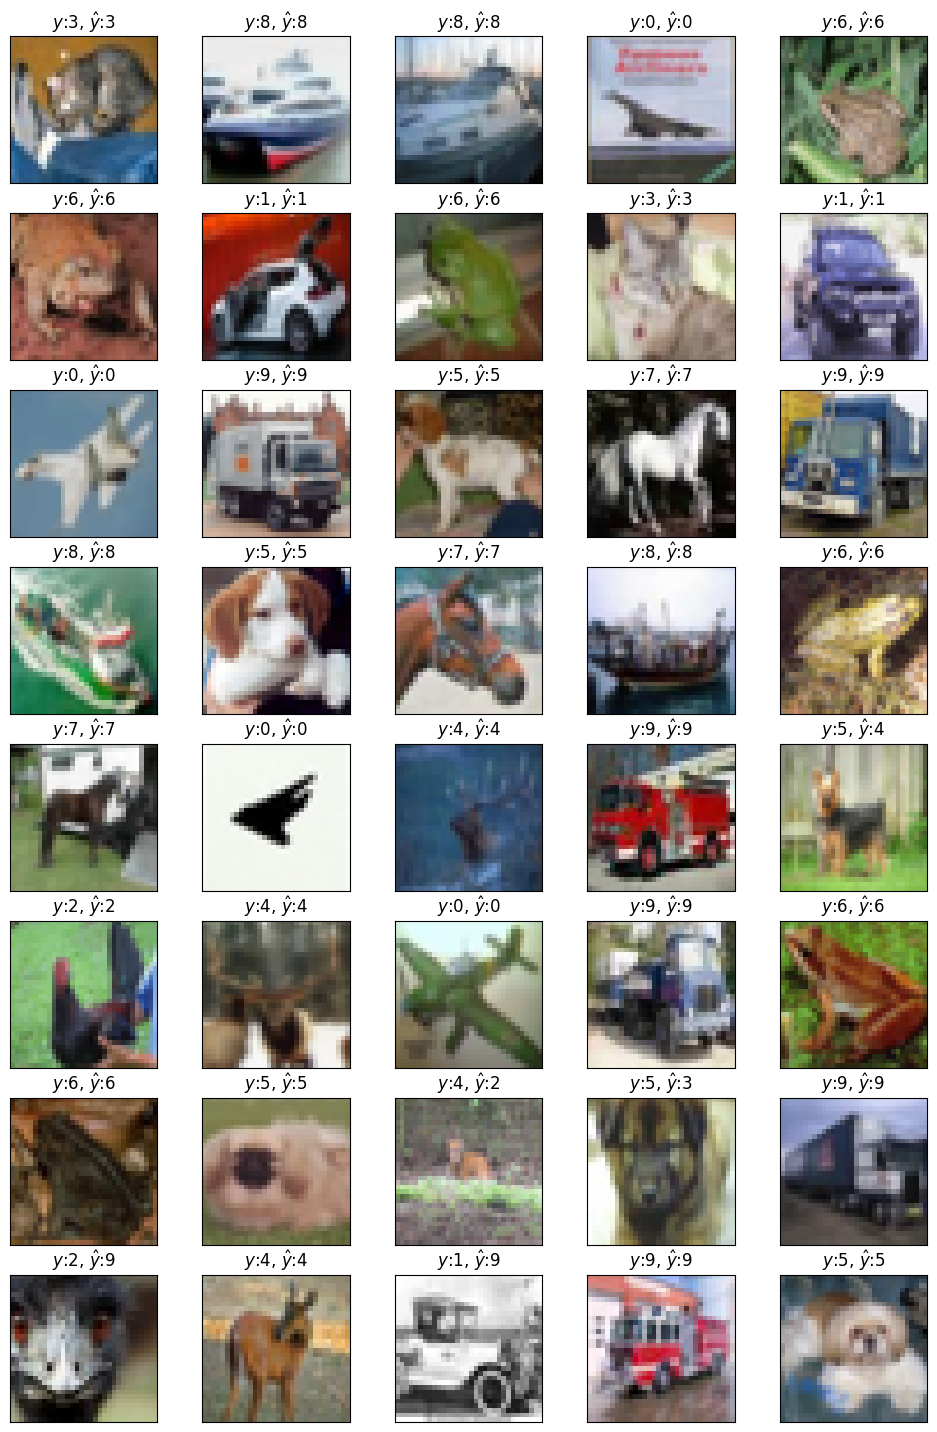

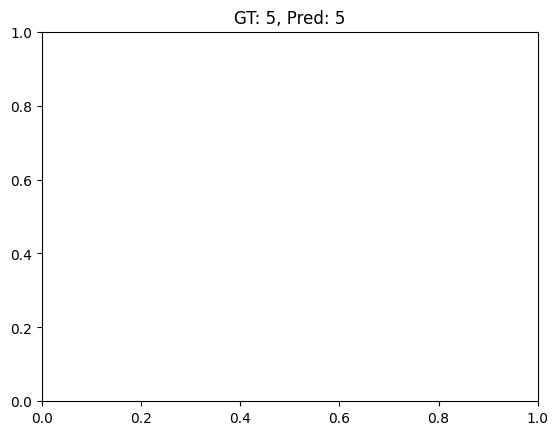

In [7]:
prob = model.predict(x_test[0:40], verbose=0)
pred = tf.argmax(prob, axis=1)

fig = plt.figure(figsize=(12, 18))
for i in range(40):
    subplot = fig.add_subplot(8, 5, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    string = r'$\hat{y}$'
    subplot.set_title(f'$y$:{tf.argmax(y_test[i])}, {string}:{pred[i].numpy()}')
    subplot.imshow(tf.squeeze(x_test[i]))
plt.show()
true_label = tf.argmax(y_test[i]).numpy()
pred_label = pred[i].numpy()
plt.title(f"GT: {true_label}, Pred: {pred_label}")
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

In [8]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.8385000228881836
